In [1]:
library("gstat")
library("sf")
library("terra")
library("ggplot2", lib.loc = "/home/jovyan/R/x86_64-pc-linux-gnu-library/4.2")
library(sp)
library(tidyverse)

Linking to GEOS 3.8.0, GDAL 3.5.0, PROJ 8.2.1; sf_use_s2() is TRUE

terra 1.6.17

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.1      ✔ stringr 1.5.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.2      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks terra::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


In [2]:
library(moments)
library(geoR)

Warning message:
“no DISPLAY variable so Tk is not available”
--------------------------------------------------------------
 Analysis of Geostatistical Data
 For an Introduction to geoR go to http://www.leg.ufpr.br/geoR
 geoR version 1.9-4 (built on 2024-02-14) is now loaded
--------------------------------------------------------------




In [3]:
library(leaflet)
library(sftime)
library(spacetime)

In [ ]:
    ###### Opening all CSVs and Do the neccesary changes in Date and Rainfall and Lat-Lon ######

In [4]:
path_1 = "/data/private/GPM/Data_All/July"

In [5]:
csvs = function(path) {
  # Read CSV file
  ds = read.csv(path)
  
  # Joining Time and Date columns
  ds[["TIME"]] <- paste(ds[["DATE.YYYY.MM.DD."]],ds[["TIME.UTC."]])
   # Convert DATE column to numeric
  ds[["TIME"]] <- (as.numeric(as.POSIXct(ds[["TIME"]], format ="%d-%m-%Y %H:%M:%S", tz = "Asia/Kolkata")))
  # If some dates are in yyyy-mm-dd format, handle them separately
  # Identify dates that are in yyyy-mm-dd format
  yyyy_mm_dd_dates <- grepl("^\\d{4}-\\d{2}-\\d{2}$", ds$DATE.YYYY.MM.DD.) 
  ds$TIME[yyyy_mm_dd_dates] = as.numeric(as.POSIXct(ds$DATE.YYYY.MM.DD.[yyyy_mm_dd_dates], format = "%Y-%m-%d %H:%M:%S", tz = "Asia/Kolkata")) 
  # Removing them
  ds <- ds[, !names(ds) %in% c("TIME.UTC.", "DATE.YYYY.MM.DD.")]
  

  # Convert Rainfall, Lat, and Lon columns to double
  ds[["RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more."]] <- as.double(ds[["RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more."]])
  ds[["Latitude"]] <- as.double(ds[["Latitude"]])
  ds[["Longitude"]] <- as.double(ds[["Longitude"]])
  
  return(ds)
}

In [45]:
            #### Another Loop, if the Dates are in different format ####

In [6]:
csvs1 = function(path) {
  # Read CSV file
  ds = read.csv(path)
  
   # Joining Time and Date columns
  ds[["TIME"]] <- paste(ds[["DATE.YYYY.MM.DD."]],ds[["TIME.UTC."]])
  # Initialize an empty vector to store the converted dates
  converted_dates <- vector("list", length = nrow(ds))
  
  # Loop through each date and determine its format dynamically
  for (i in 1:nrow(ds)) {
    date_str <- as.character(ds[i, "DATE.YYYY.MM.DD."])
    
    # Try converting the date to POSIXct with each format
    date_formats <- c("%d-%m-%Y", "%Y-%m-%d")
    converted_date <- NA
    
    for (format in date_formats) {
      try_date <- as.POSIXct(date_str, format = format, tz = "Asia/Kolkata")
      if (!is.na(try_date)) {
        converted_date <- try_date
        break
      }
    }
    
    converted_dates[[i]] <- converted_date
  }
  
  # Assign the converted dates back to the data frame
  ds$TIME <- unlist(converted_dates)
    
 # Removing them
  ds <- ds[, !names(ds) %in% c("TIME.UTC.", "DATE.YYYY.MM.DD.")]
  
  # Convert Rainfall, Lat, and Lon columns to double
  ds[["RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more."]] <- as.double(ds[["RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more."]])
  ds[["Latitude"]] <- as.double(ds[["Latitude"]])
  ds[["Longitude"]] <- as.double(ds[["Longitude"]])
  
  return(ds)
}

In [7]:
csv_file = list.files(path_1, full.names = TRUE)
for (file in csv_file){
    procs_csv = csvs1(file)
    write.csv(procs_csv, file = file, row.names = FALSE)
    }

In [8]:
csvs_1 = function(path) {
    fl = read.csv(path)
    #Changing UNIX time POSIXlt
    fl[["TIME"]] = as.POSIXlt(fl[["TIME"]], origin = "1970-01-01", tz = "Asia/Kolkata")
    
    return(fl)
    }
csv_1 = list.files(path_1, full.names =TRUE)
for (f in csv_1) {
    csv_a = csvs_1(f)
    write.csv(csv_a,file = f, row.names = FALSE)
    }

    

In [4]:
       ####  Putting all days in to a single csv file ####

In [20]:
library(purrr)

In [10]:
file_list <- list.files(path = path_1, pattern = "*.csv", full.names = TRUE)

# Read and combine all CSV files into a single data frame
combined_data <- file_list %>%
  map_df(read.csv)


In [13]:
write.csv(combined_data, "/data/private/GPM/Data_All/Combined Data_2023/July_all.csv", row.names = FALSE)

In [4]:
 fll = "/data/private/GPM/Data_All/Combined Data_2023/July_all.csv"

In [5]:
fll_df = read.csv(fll)

In [6]:
head(fll_df)

,S.NO.,STATE,DISTRICT,STATION,TYPE,RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more.,Latitude,Longitude,TIME
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1,UTTARAKHAND,ALMORA,ALMORA_UKG,AWS,3.5,29.6002,79.6651,01-07-2023
2,2,UTTARAKHAND,ALMORA,CHAUKHUTIYA_UKG,AWS,10.0,29.8844,79.3502,01-07-2023
3,3,UTTARAKHAND,ALMORA,DWARHAT_UKG,AWS,4.0,29.7795,79.4315,01-07-2023
4,4,UTTARAKHAND,ALMORA,JAGESHWAR_UKG,AWS,0.5,29.6381,79.8527,01-07-2023
5,5,UTTARAKHAND,ALMORA,SITLAKHET_UKG,AWS,4.5,29.5940,79.5442,01-07-2023
6,6,UTTARAKHAND,ALMORA,SULT_UKG,AWS,2.5,29.6893,79.1583,01-07-2023


In [7]:
exists <- any(fll_df == 987)
print(exists)
index <- which(fll_df == 987, arr.ind = TRUE)
index

[1] TRUE


row,col
987,1
1863,6


In [7]:
xs = 200
fll_df_mod = fll_df[fll_df$"RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more." <= xs, ]

In [5]:
dim(fll_df_mod)

[1] 1903    9

In [12]:
  ######  Removing the Duplicated Data, updt_flldf  #######

** __Removing same Lat and Lon values will not be good for Spatial Prediction in daily scale__ **

In [9]:
duplc = duplicated(fll_df_mod[c("Latitude", "Longitude")])

In [10]:
updt_flldf = fll_df_mod[!duplc,]
dim(updt_flldf)

[1] 103   9

In [100]:
                    ######## Spatial Df with Original Data #######

In [11]:
coordinates_0 = data.frame(lon = fll_df_mod$Longitude, lat = fll_df_mod$Latitude)
coords_0 = SpatialPoints(coordinates_0)# make it Spatial Pixels
fll_11 = subset(fll_df_mod, select = -c(Longitude,Latitude) )
sd_jul1 = SpatialPointsDataFrame(coords_0,fll_11)
class(sd_jul1)
proj4string(sd_jul1) =CRS("+proj=utm +zone=43 +datum=WGS84 +units=km +no_defs")
dim(sd_jul1)
proj4string(coords_0) = CRS("+proj=utm +zone=43 +datum=WGS84 +units=km +no_defs")

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

[1] 1903    7

In [108]:
# head(as.data.frame(sd_jul1))

In [14]:
           ####### Spatial DF for the data with the removed stations  #######

In [12]:
coordinates_1 = data.frame(lon = updt_flldf$Longitude, lat = updt_flldf$Latitude)
coords_1 = SpatialPoints(coordinates_1)# make it Spatial Pixels
fll_1 = subset(updt_flldf, select = -c(Longitude,Latitude) )
sd_jul = SpatialPointsDataFrame(coords_1,fll_1)
class(sd_jul)
proj4string(sd_jul) =CRS("+proj=utm +zone=43 +datum=WGS84 +units=km +no_defs")
dim(sd_jul)
proj4string(coords_1) = CRS("+proj=utm +zone=43 +datum=WGS84 +units=km +no_defs")
summary(coords_1)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

[1] 103   7

Object of class SpatialPoints
Coordinates:
        min     max
lon 77.7821 80.5450
lat 28.8829 31.0372
Is projected: TRUE 
proj4string :
[+proj=utm +zone=43 +datum=WGS84 +units=km +no_defs]
Number of points: 103

In [13]:
head(as.data.frame(sd_jul))

,S.NO.,STATE,DISTRICT,STATION,TYPE,RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more.,TIME,lon,lat
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1,UTTARAKHAND,ALMORA,ALMORA_UKG,AWS,3.5,01-07-2023,79.6651,29.6002
2,2,UTTARAKHAND,ALMORA,CHAUKHUTIYA_UKG,AWS,10.0,01-07-2023,79.3502,29.8844
3,3,UTTARAKHAND,ALMORA,DWARHAT_UKG,AWS,4.0,01-07-2023,79.4315,29.7795
4,4,UTTARAKHAND,ALMORA,JAGESHWAR_UKG,AWS,0.5,01-07-2023,79.8527,29.6381
5,5,UTTARAKHAND,ALMORA,SITLAKHET_UKG,AWS,4.5,01-07-2023,79.5442,29.5940
6,6,UTTARAKHAND,ALMORA,SULT_UKG,AWS,2.5,01-07-2023,79.1583,29.6893


In [19]:
x1 = as.data.frame(sd_jul1$TIME)
x1_t = t(x1)
dim(x1_t)

[1]    1 1903

In [16]:
dates = as.POSIXct((sd_jul1$TIME),tz = "Asia/Kolkata", format = "%d-%m-%Y" )

In [20]:
dates_1 = as.POSIXct((x1_t),tz = "Asia/Kolkata", format = "%d-%m-%Y")

In [17]:
head(dates)

[1] "2023-07-01 IST" "2023-07-01 IST" "2023-07-01 IST" "2023-07-01 IST"
[5] "2023-07-01 IST" "2023-07-01 IST"

In [18]:
length(dates)

[1] 1903

In [22]:
rainfal_1 = as.data.frame(fll_df$"RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more.")
dim(rainfal_1)
max(rainfal_1)

[1] 1923    1

[1] 987

In [14]:
rainfal = as.data.frame(fll_df_mod$"RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more.")
dim(rainfal)
max(rainfal)

[1] 1903    1

[1] 193

In [25]:
class(rainfal)

[1] "data.frame"

In [28]:
rf = expand_grid(rainfal, 1:1923)
nrow(rf)

[1] 3659469

In [102]:
                                 #### Making STIDF #####

In [19]:
stidf_0  = STIDF(time = dates, coords_0, data = rainfal)

In [20]:
dim(stidf_0)

space      time variables 
     1903      1903         1

In [21]:
summary(
    object = stidf_0)

Object of class STIDF
 with Dimensions (s, t, attr): (1903, 1903, 1)
[[Spatial:]]
Object of class SpatialPoints
Coordinates:
        min     max
lon 77.7821 80.5450
lat 28.8829 31.0372
Is projected: TRUE 
proj4string :
[+proj=utm +zone=43 +datum=WGS84 +units=km +no_defs]
Number of points: 1903
[[Temporal:]]
     Index                          timeIndex     
 Min.   :2023-07-01 00:00:00.00   Min.   :   1.0  
 1st Qu.:2023-07-07 00:00:00.00   1st Qu.: 476.5  
 Median :2023-07-12 00:00:00.00   Median : 952.0  
 Mean   :2023-07-12 12:30:38.77   Mean   : 952.0  
 3rd Qu.:2023-07-19 00:00:00.00   3rd Qu.:1427.5  
 Max.   :2023-07-25 00:00:00.00   Max.   :1903.0  
[[Data attributes:]]
 fll_df_mod$RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more.
 Min.   :  0.50                                       
 1st Qu.:  4.00                                       
 Median : 13.50                                       
 Mean   : 23.24                                       
 3rd Qu.: 32.50                       

In [22]:
stidf_0df = (as.data.frame(stidf_0))
head(stidf_0df)

,lon,lat,sp.ID,time,endTime,timeIndex,fll_df_mod.RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more.
,<dbl>,<dbl>,<int>,<dttm>,<dttm>,<int>,<dbl>
1,79.6651,29.6002,1,2023-07-01,2023-07-01,1,3.5
2,79.3502,29.8844,2,2023-07-01,2023-07-01,2,10.0
3,79.4315,29.7795,3,2023-07-01,2023-07-01,3,4.0
4,79.8527,29.6381,4,2023-07-01,2023-07-01,4,0.5
5,79.5442,29.5940,5,2023-07-01,2023-07-01,5,4.5
6,79.1583,29.6893,6,2023-07-01,2023-07-01,6,2.5


In [31]:
rain_f =(stidf_0df[["fll_df_mod.RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more."]])
class(rain_f)

[1] "numeric"

In [27]:
# (stidf_0)

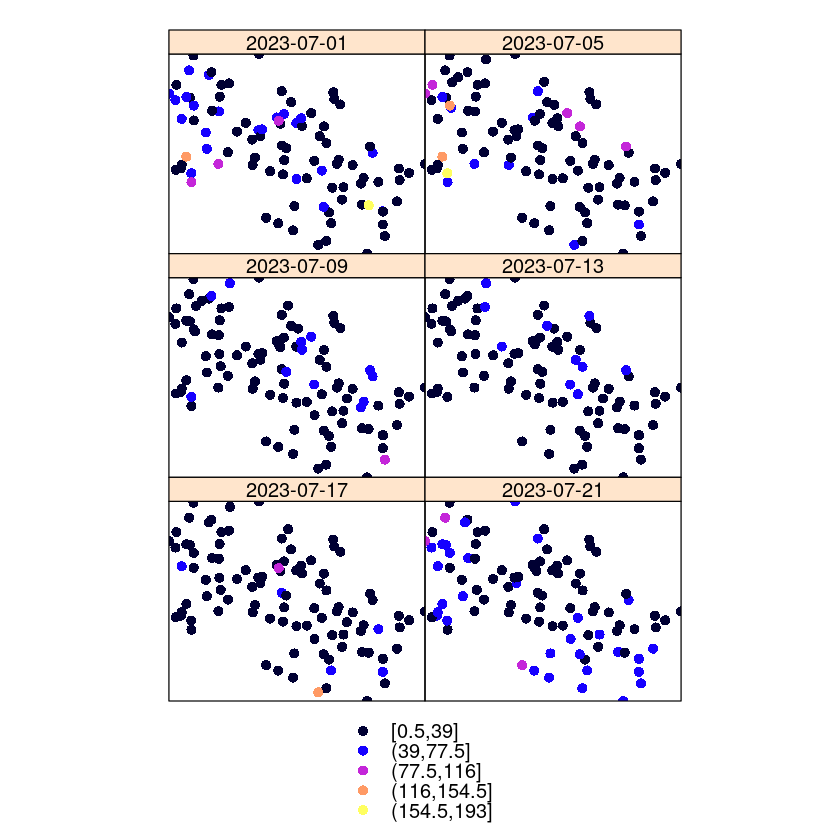

In [23]:
stplot(stidf_0)

In [24]:
class(stidf_0)

[1] "STIDF"
attr(,"package")
[1] "spacetime"

In [38]:
# Check dimensions
# length(dates) == nrow(rainfal)
f = (length(coords_0) * length(dates) == nrow(rainfal))
isTRUE(f)

[1] FALSE

In [132]:
class(coords_0)

[1] "SpatialPoints"
attr(,"package")
[1] "sp"

In [36]:
                        ####### Need to check the Temporal Autocorrelation ########

In [34]:
as.data.frame(stidf_0$sp.ID)


<0 x 0 matrix>

In [37]:
                           ###########  Variogram Generation #############

In [ ]:
vgm_1_st =  variogramST(fll_df_mod$RAINFALL.DAILY.CUMULATIVE..0.5.mm.or.more.~1,data=stidf_0,tunit="days",assumeRegular=F,na.omit=T) 

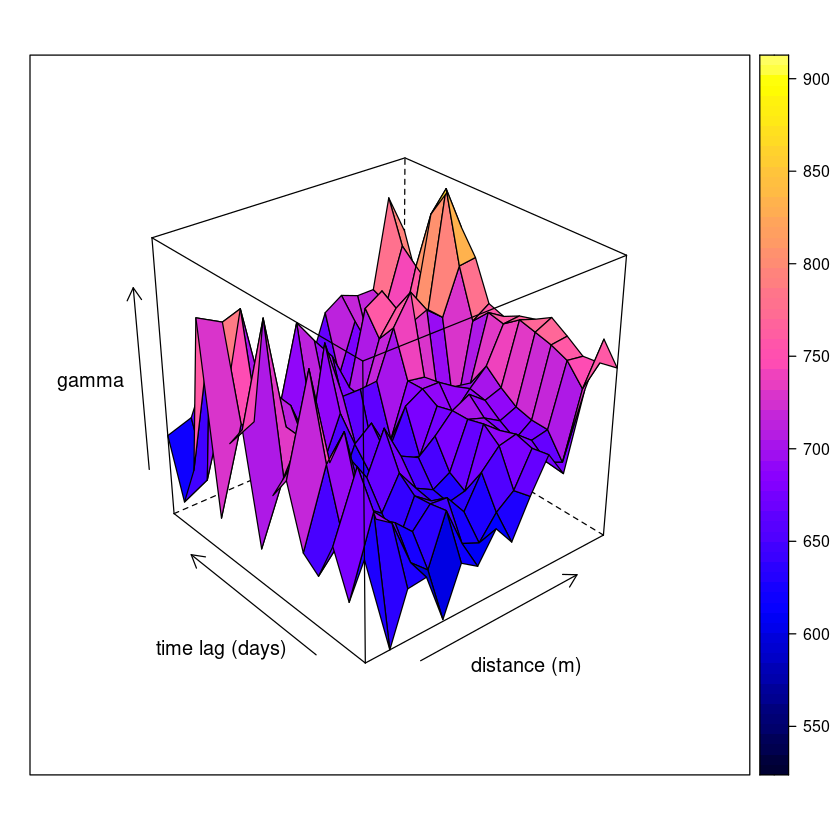

In [34]:
plot(vgm_1_st, wireframe = T)

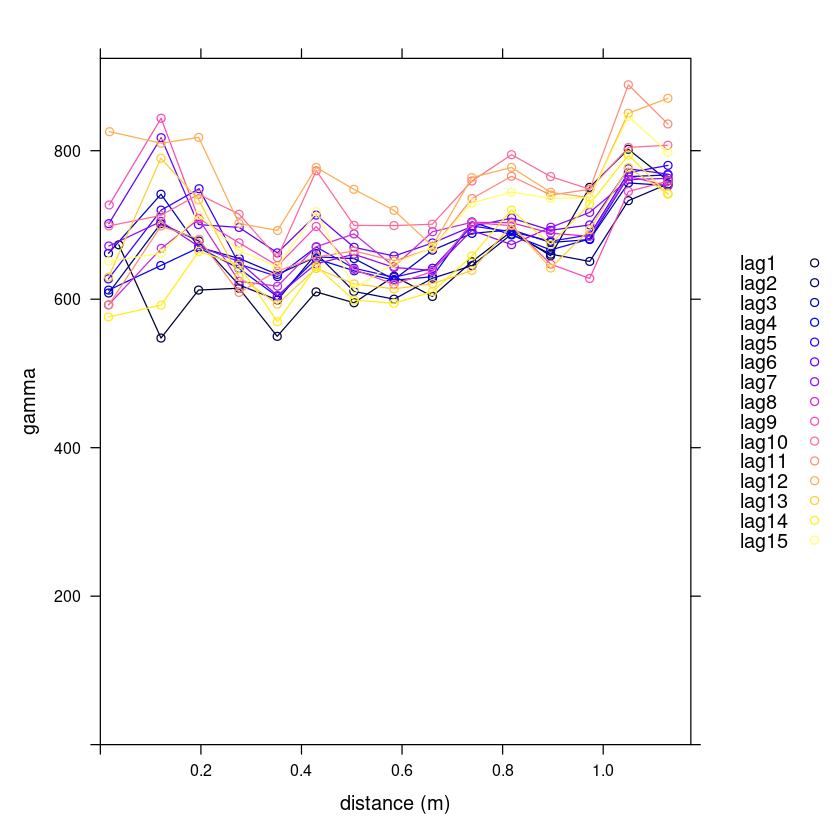

In [35]:
plot(vgm_1_st, map = F)



	demo(stkrige)
	---- ~~~~~~~

> # Ben Graeler, 25 th March, 2016
> #
> # Script reproducing the fit of the vignette "spatio-temporal-kriging
> 
> # libraries
> library(sp)

> library(spacetime)

> library(gstat)

> library(rgdal)


Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-32, (SVN revision 1176)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.5.0, released 2022/05/10
Path to GDAL shared files: /usr/local/share/gdal
 GDAL does not use iconv for recoding strings.
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 8.2.1, January 1st, 2022, [PJ_VERSION: 821]
Path to PROJ shared files: /home/jovyan/.local/share/proj:/usr/local/share/proj:/usr/local/share/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.5-0
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.


Attaching package: ‘rgdal’


The following object is masked from ‘package:terra’:

    project





> # load data from package gstat
> data(DE_RB_2005, package = "gstat")

> paper <- FALSE

> set.seed(123)

> smplDays <- sort(sample(365,8))

> # load German boundaries
> data(air)

> DE_NUTS1 <- spTransform(DE_NUTS1, CRS("+init=epsg:32632"))

> if(!paper)
+   plot(DE_NUTS1)

> # station wise coverage
> if(!paper)
+   barplot(sort(table(DE_RB_2005@index[,1])),  
+           main="reported days per station",
+           ylab="number of days", xaxt="n")


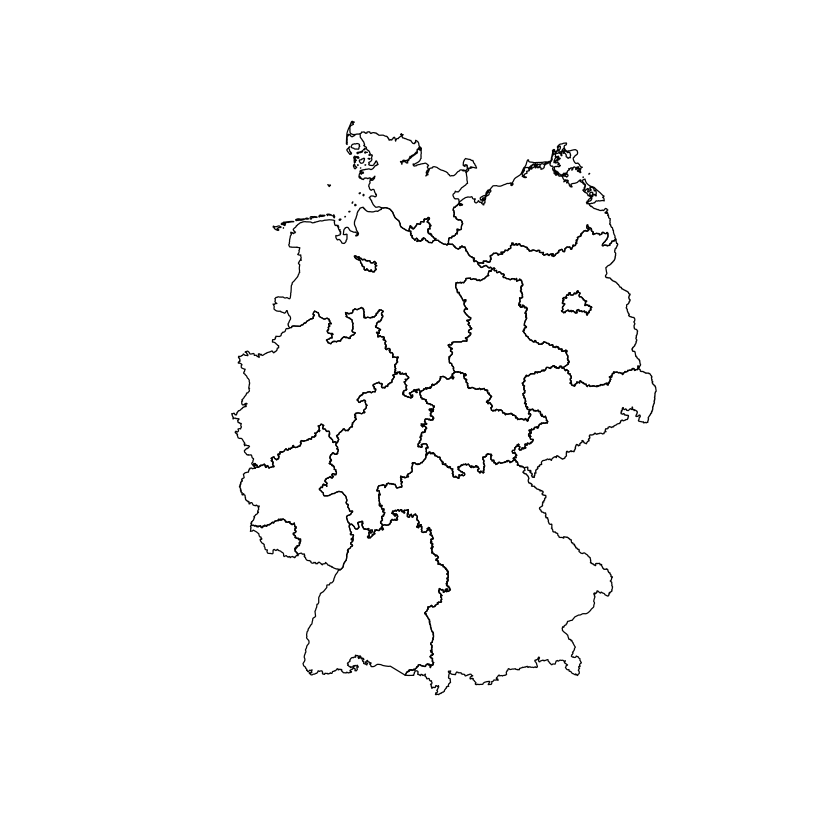


> # acf
> if(!paper) {
+   acf(DE_RB_2005[sample(68,1),,drop=F]@data)
+   var(DE_RB_2005@data$PM10)
+ }


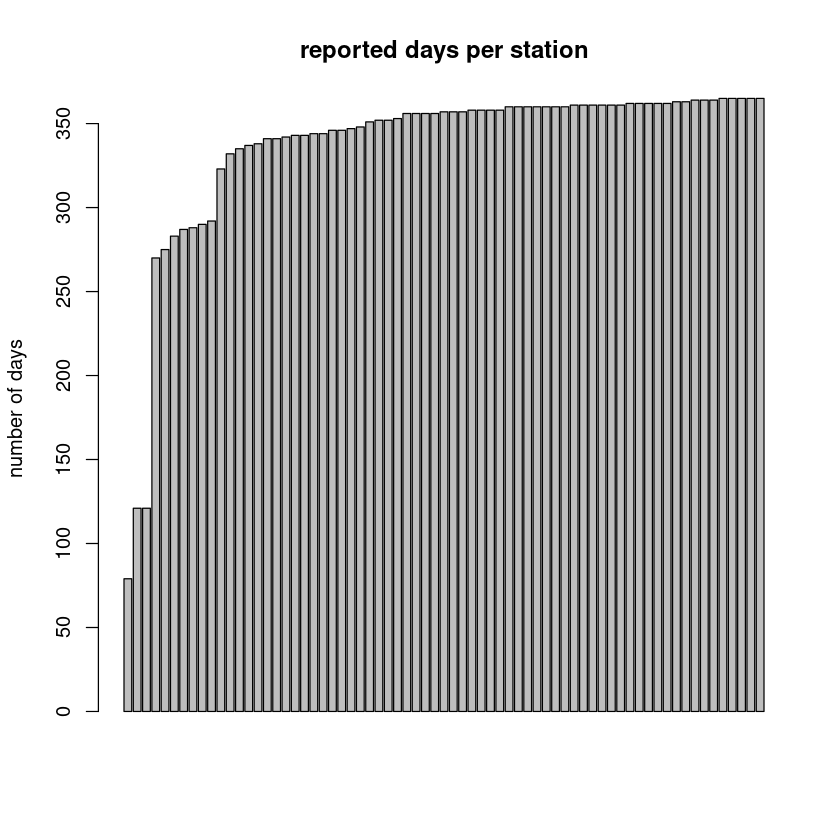

[1] 127.8739

> # a few daily snapshots
> if(paper)
+   png("vignettes/figures/daily_means_PM10.png", width=9, height=6, "in", res=150)

> stplot(as(DE_RB_2005[,smplDays],"STFDF"),
+        col.regions=bpy.colors(120)[-(1:20)],
+        sp.layout = list("sp.polygons", DE_NUTS1), scales=list(draw=F), 
+        key.space="right", colorkey=T, cuts=0:70,
+        main=NULL)


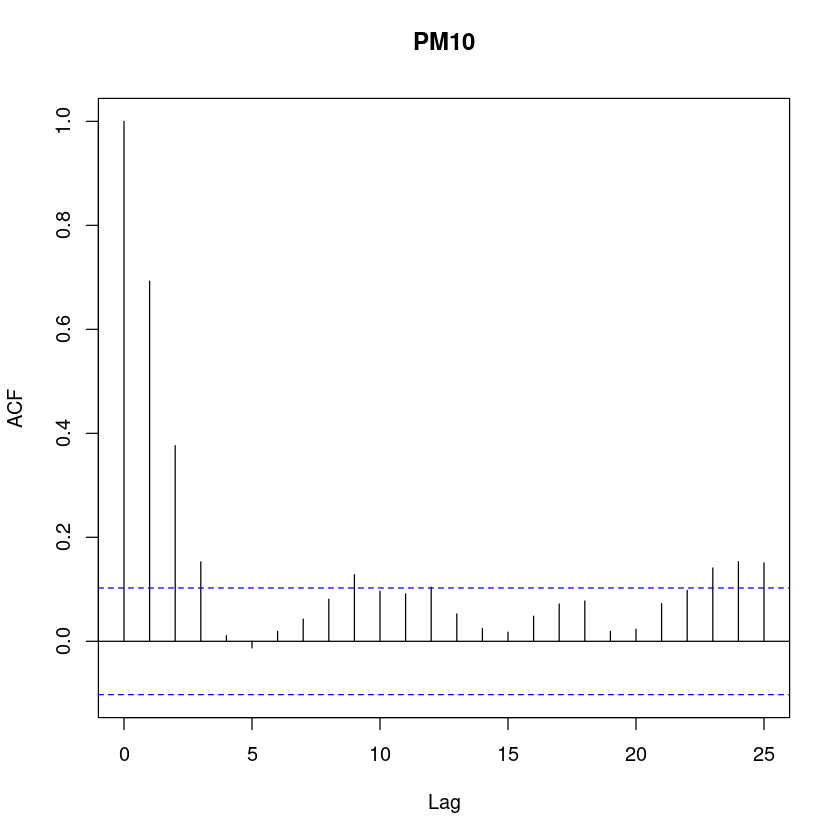


> if(paper)
+   dev.off()

> # number of stations
> length(DE_RB_2005@sp)
[1] 69

> # calculate the empirical variogram
> empVgm <- variogramST(PM10~1, DE_RB_2005, tlags=0:6)

> if(!paper) {
+   plot(empVgm, wireframe=T, scales=list(arrows=F))
+   plot(empVgm)
+ }


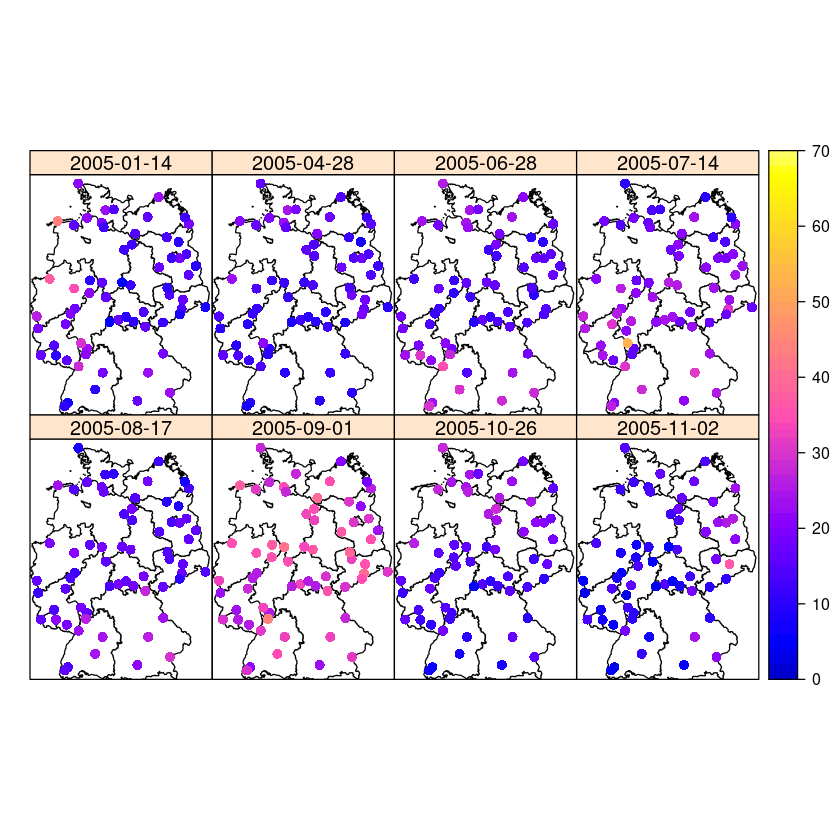


> # fit of theoretical purely spatial models #
> ############################################
> spEmpVgm <- empVgm[empVgm$timelag == 0,]

> class(spEmpVgm) <- c("gstatVariogram", "data.frame")

> spEmpVgm <- spEmpVgm[-1,1:3]

> spEmpVgm$dir.hor <- 0

> spEmpVgm$dir.ver <- 0

> spVgmMod <- fit.variogram(spEmpVgm, vgm(80,"Exp",300000,20))

> if(!paper)
+   plot(spEmpVgm, spVgmMod)


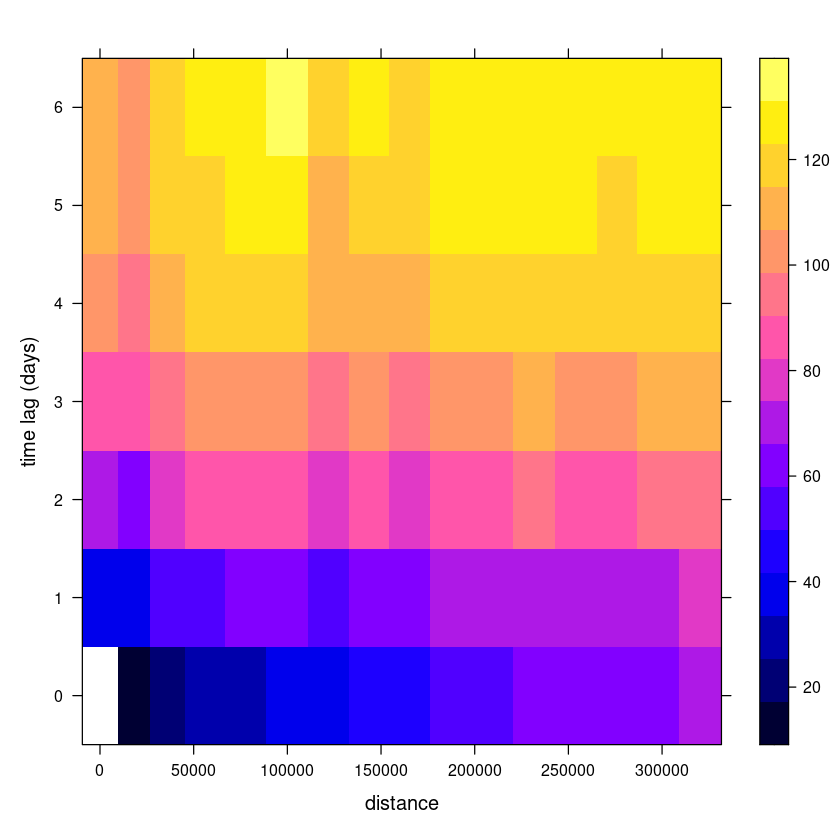


> # fit of theoretical spatio-temporal models #
> #############################################
> 
> linStAni <- estiStAni(empVgm, c(50000,200000))

> if(!paper) {
+   plot(gamma~dist, empVgm[empVgm$timelag == 0,], ylim=c(0,100), xlim=c(0,800000))
+   points(empVgm[empVgm$spacelag == 0,]$timelag*linStAni, empVgm[empVgm$spacelag == 0,]$gamma, col="red")
+ }


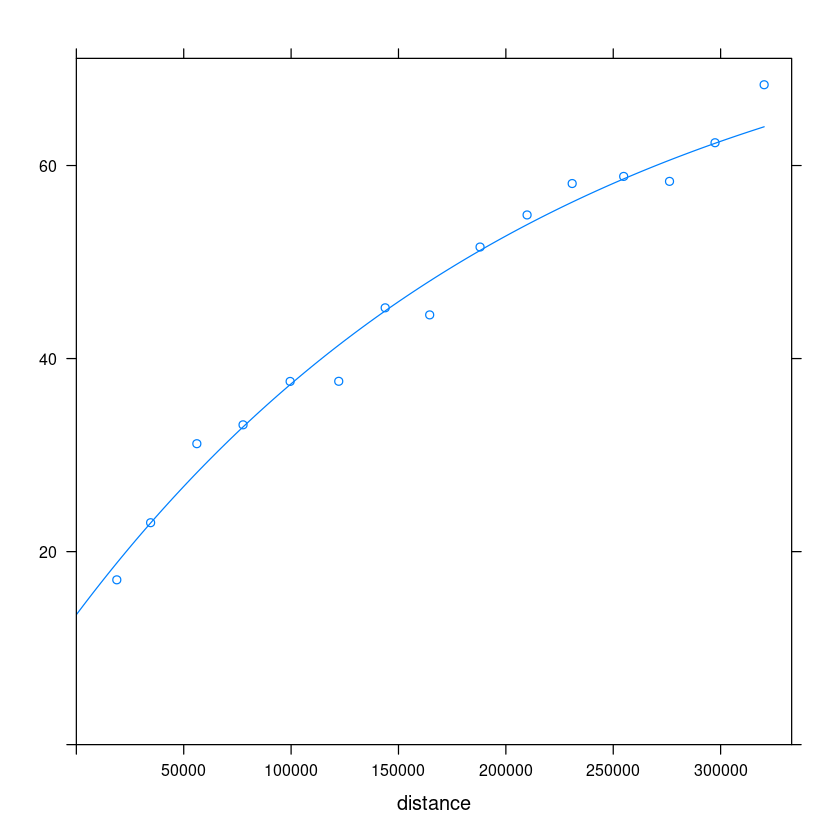


> ##
> # rescale empVgm and linStAni to km for estimation
> empVgm$dist  <- empVgm$dist/1000

> empVgm$avgDist  <- empVgm$avgDist/1000

> empVgm$spacelag <- empVgm$spacelag/1000

> linStAni <- linStAni/1000

> # separable
> separableModel <- vgmST("separable", 
+                         space=vgm(0.9,"Exp", 200, 0.1),
+                         time =vgm(0.9,"Sph", 3.5, 0.1),
+                         sill=120)

> fitSepModel <- fit.StVariogram(empVgm, separableModel, fit.method = 7, 
+                                stAni = linStAni, method = "L-BFGS-B", 
+                                control = list(parscale=c(100,1,10,1,100)),
+                                lower = c(10,0,.1,0,0.1), 
+                                upper = c(2000,1,12,1,200))

> attr(fitSepModel, "optim.output")$value
[1] 6.817119

> # Exp+Exp: 9.87, Exp+Sph: 6.82, Sph+Exp: 10.42, Sph+Sph: 7.50
> if(!paper)
+   plot(empVgm, fitSepModel, wireframe=T, all=T, scales=list(arrows=F), zlim=c(0,135))


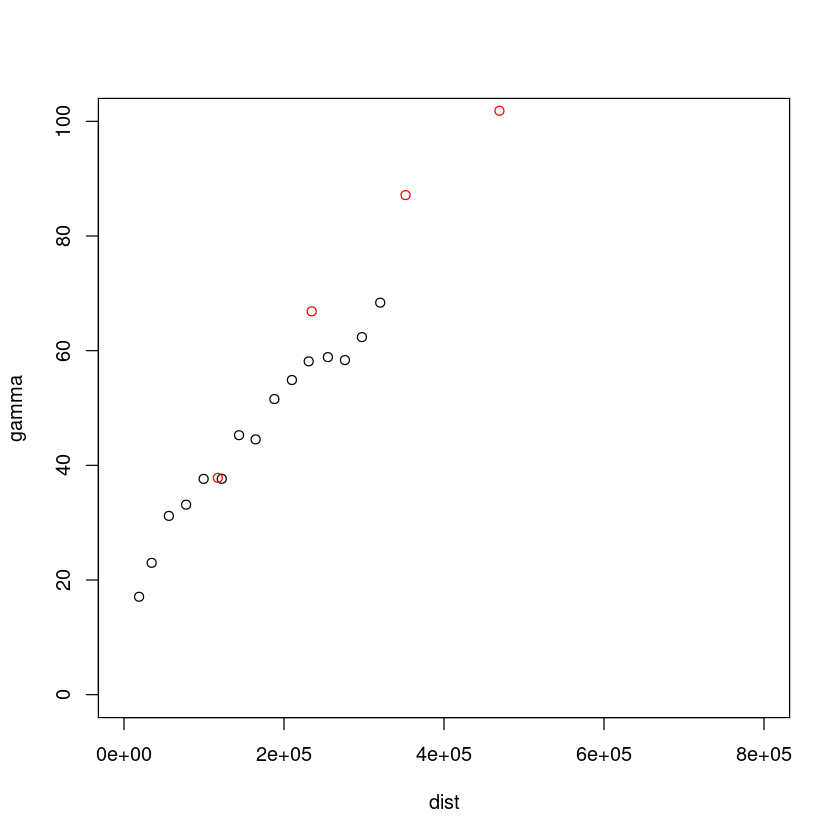


> # product-sum
> prodSumModel <- vgmST("productSum",
+                       space=vgm(10, "Exp", 200, 1),
+                       time= vgm(10, "Sph",   2, 1), 
+                       k=2)

> fitProdSumModel <- fit.StVariogram(empVgm, prodSumModel, fit.method = 7, 
+                                    stAni = linStAni, method = "L-BFGS-B", 
+                                    control = list(parscale = c(1,10,1,1,0.1,1,10)),
+                                    lower = rep(0.0001,7))

> attr(fitProdSumModel, "optim.output")$value
[1] 6.882313

> # Exp+Exp: 10.09, Exp+Sph: 6.91, Sph+Exp: 10.64, Sph+Sph: 7.59
> plot(empVgm, fitProdSumModel, wireframe=T, all=T, scales=list(arrows=F), zlim=c(0,135))


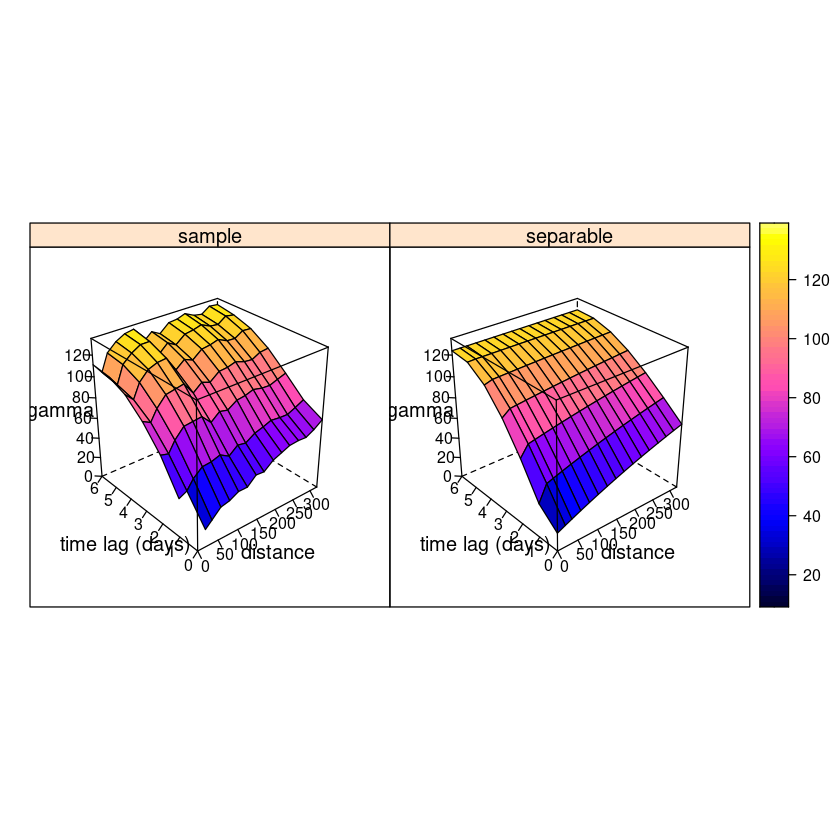


> # metric
> metricModel <- vgmST("metric",
+                      joint = vgm(60, "Mat", 150, 10, kappa=0.6),
+                      stAni = 60)

> fitMetricModel <- fit.StVariogram(empVgm, metricModel, fit.method = 7,
+                                   stAni = linStAni, method = "L-BFGS-B",
+                                   control = list(parscale = c(10,20,5,10)),
+                                   lower = c(80,50,5,50),
+                                   upper = c(200,1500,60,300))

> attr(fitMetricModel, "optim.output")$value 
[1] 10.04597

> # Exp: 10.25, Sph: 10.59,
> # Gau: 21.32, Mat 5: 18.20, Mat 2: 14.43, Mat 1.25: 12.04,
> # Mat 1: 11.07, Mat 0.75: 10.23, Mat 0.6: 10.05
> if(!paper)
+   plot(empVgm, fitMetricModel, wireframe=T, all=T, scales=list(arrows=F), zlim=c(0,135))


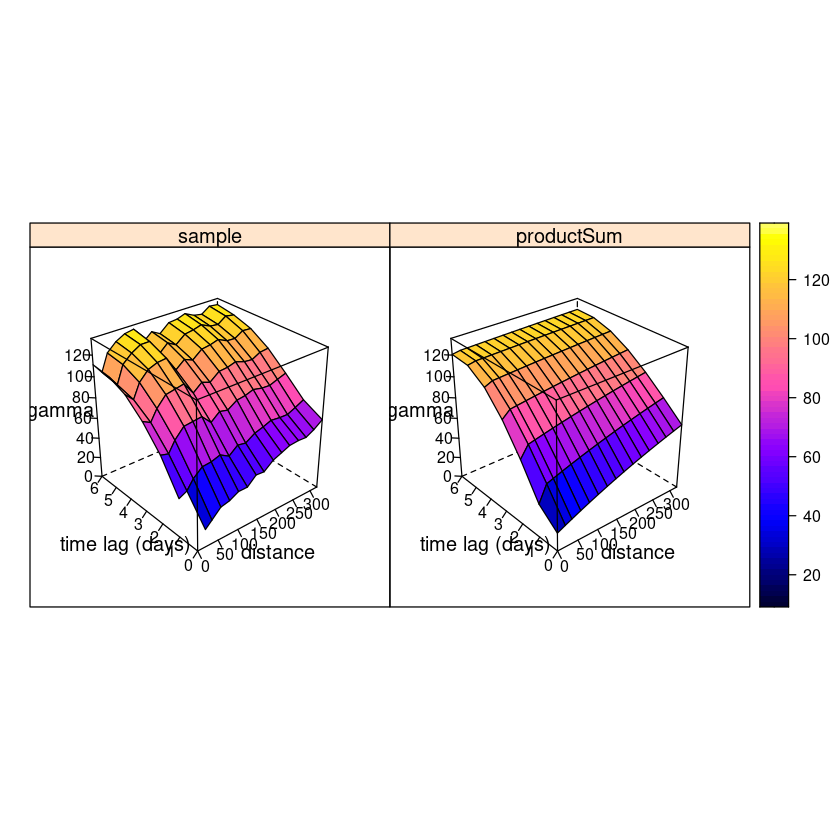


> # simplified sumMetric model?
> sumMetricFromsimpleSumMetric <- function(vgm) {
+   vgmST("sumMetric",
+         space=vgm(vgm$space$psill, vgm$space$model, vgm$space$range, vgm$nugget/3),
+         time =vgm(vgm$time$psill, vgm$time$model, vgm$time$range, vgm$nugget/3),
+         joint=vgm(vgm$joint$psill, vgm$joint$model, vgm$joint$range, vgm$nugget/3),
+         stAni=vgm$stAni)
+ }

> simpleSumMetricModel <- vgmST("simpleSumMetric",
+                               space=vgm(120,"Sph", 150),
+                               time =vgm(120,"Exp", 10),
+                               joint=vgm(120,"Sph", 150),
+                               nugget=10, stAni=150)

> fitSimpleSumMetricModel <- fit.StVariogram(empVgm, simpleSumMetricModel,
+                 fit.method = 7, stAni=linStAni,
+                 method = "L-BFGS-B",
+                 lower = c(sill.s = 0, range.s = 10,
+                           sill.t = 0, range.t = 0.1,
+                           sill.st= 0, range.st= 10

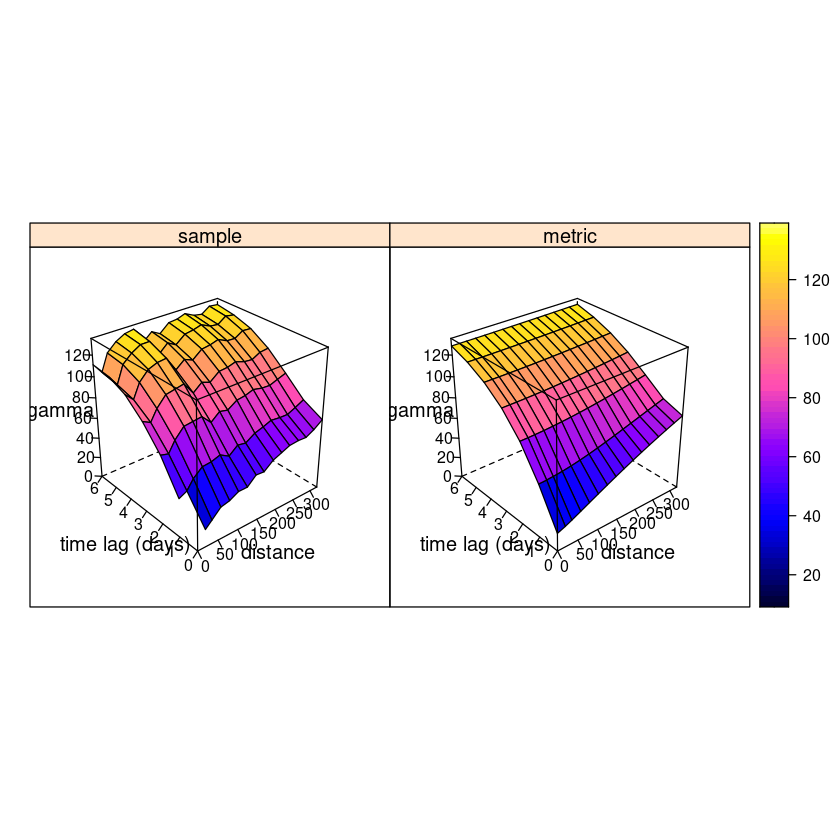


> # sum-metric
> # sumMetricModel <- sumMetricFromsimpleSumMetric(fitSimpleSumMetricModel)
> 
> sumMetricModel <- vgmST("sumMetric",
+                         space = vgm(20, "Sph", 150, 1),
+                         time = vgm(10, "Exp", 2, 0.5),
+                         joint = vgm(80, "Sph", 1500, 2.5),
+                         stAni = 120)

> fitSumMetricModel <- fit.StVariogram(empVgm, sumMetricModel, fit.method = 7, stAni=linStAni,
+                 method = "L-BFGS-B", 
+                 lower = c(sill.s = 0,  range.s = 10,  nugget.s = 0,
+                           sill.t = 0,  range.t = 0.1,   nugget.t = 0,
+                           sill.st= 0, range.st = 10, nugget.st = 0, 
+                           anis = 40),
+                 upper = c(sill.s = 200,  range.s = 1E3,  nugget.s = 20,
+                           sill.t = 200,  range.t = 75,   nugget.t = 20,
+                           sill.st= 200, range.st = 5E3, nugget.st = 20,
+                           anis = 500),

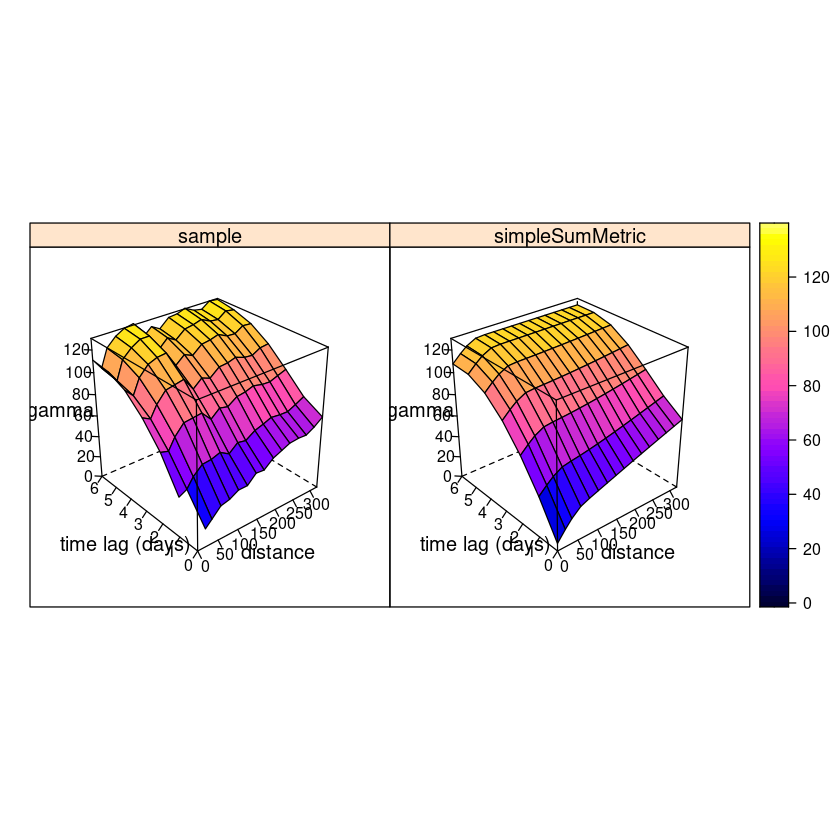


> if(!paper)
+   plot(empVgm,fitSumMetricModel, wireframe=T, all=T, scales=list(arrows=F), zlim=c(0,130))


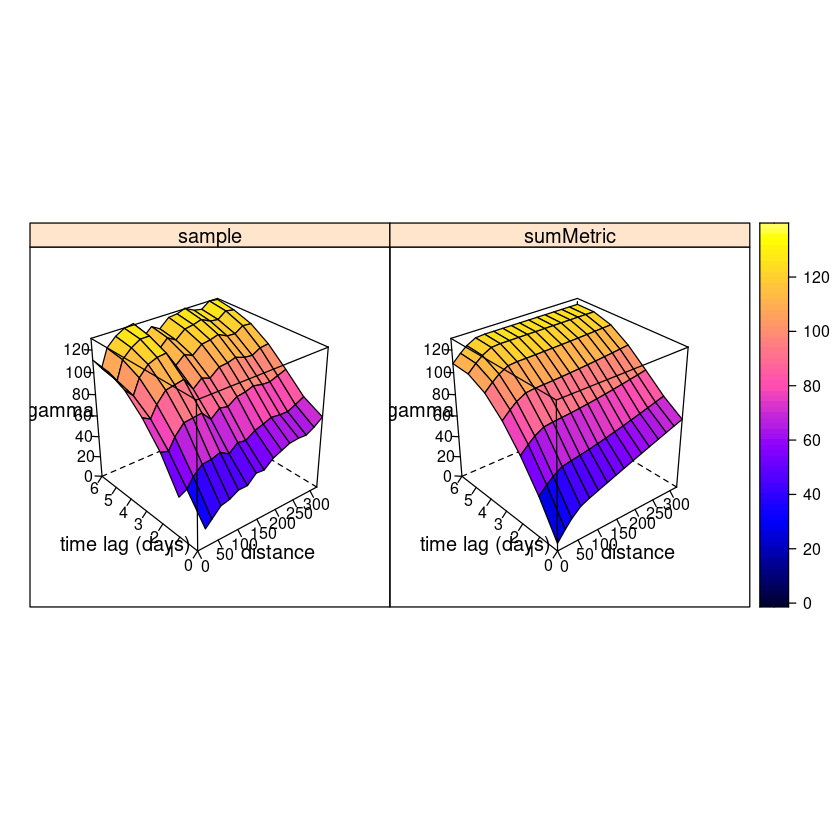


> if(paper)
+   png("vignettes/figures/allVgmsWireframe.png", 9, 6, "in", bg="white", res = 150)

> plot(empVgm, list(fitSepModel, fitProdSumModel, fitMetricModel,
+                   fitSumMetricModel, fitSimpleSumMetricModel), 
+      wireframe=T, all=T, zlim=c(0,140), ylim=c(0,6.1), xlim=c(0,300),
+      scales=list(arrows = F, cex=.8,
+                  x=list(at=0:3*100), 
+                  y=list(at=0:6, labels=c("0 ","","2 ","","4 ","","6 ")), 
+                  z=list(at=0:5*25, labels=c("0  ","","50   ","","100    ",""))),
+      at=0:100*1.4,
+      xlab=list("space [km]", rot=27, cex=0.8), 
+      ylab=list("time [days]", rot=-40, cex=0.8),
+      zlab=list(NULL, rot=94, cex=0.8))


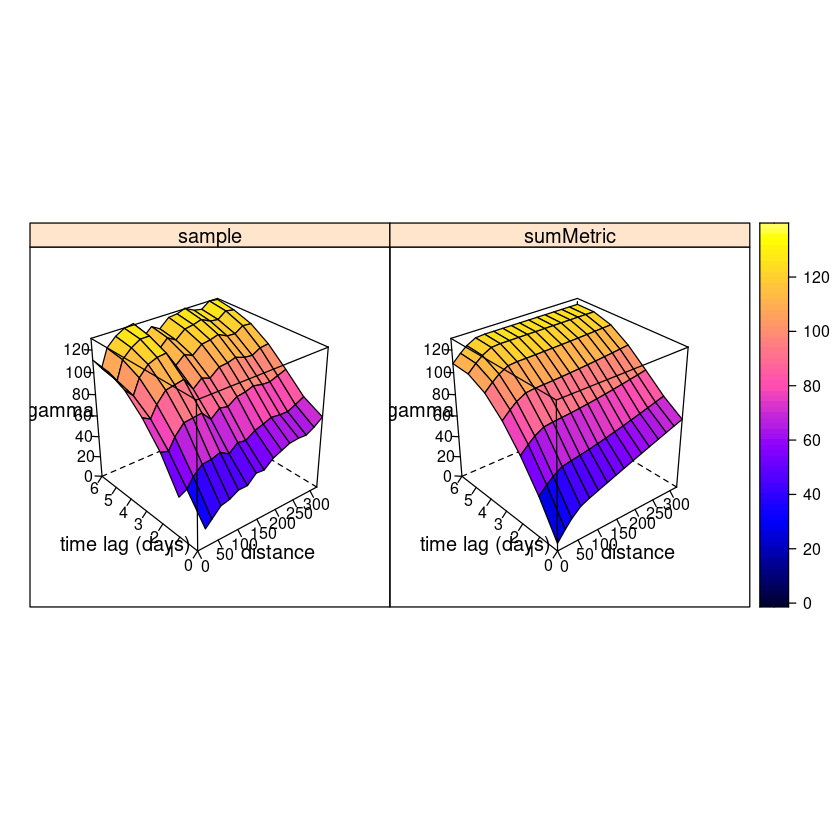


> if(paper)
+   dev.off()

> if(paper)
+   png("vignettes/figures/allVgmsDiffWireframe.png", 9, 6, "in", bg="white", res = 150)

> plot(empVgm, list(fitSepModel, fitProdSumModel, fitMetricModel,
+                   fitSumMetricModel, fitSimpleSumMetricModel), 
+      wireframe=T,  all=T, zlim=c(-10,25), ylim=c(0,6.1), xlim=c(0,300), 
+      diff=TRUE,
+      scales=list(arrows = F, cex=.8,
+                  x=list(at=0:3*100), 
+                  y=list(at=0:6, labels=c("0 ","","2 ","","4 ","","6 ")), 
+                  z=list(at=-2:5*5, labels=c("-10  ","","0  ","","10  ","","20  ",""))),
+      xlab=list("space [km]", rot=27, cex=0.8), 
+      ylab=list("time [days]", rot=-40, cex=0.8),
+      zlab=list(NULL, rot=94, cex=0.8))


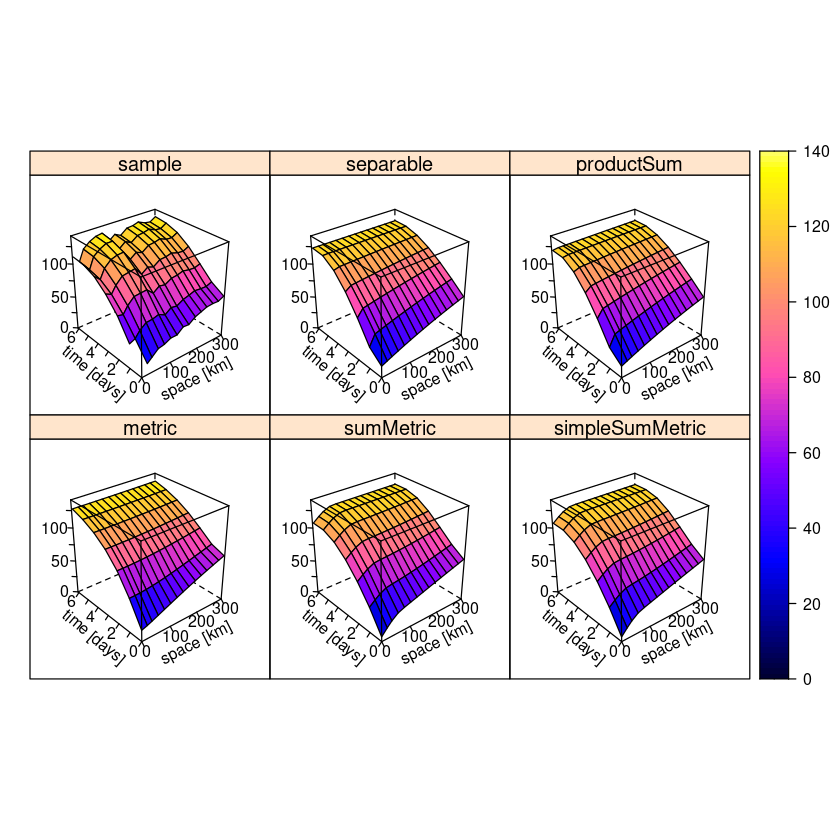


> if(paper)
+   dev.off()

> if(paper) {
+   library(lattice)
+   spacelag <- rep(0:300, 13)
+   timelag <- rep(0:12/2,each=301)  
+   
+   cplot <- contourplot(model~spacelag+timelag|type, 
+                        rbind(cbind(variogramSurface(fitSumMetricModel, 
+                                                     data.frame(spacelag=spacelag,
+                                                                timelag=timelag)),
+                                    data.frame(type = rep("variogram of the sum-metric model", length(spacelag)))),
+                              data.frame(spacelag=spacelag,
+                                         timelag=timelag,
+                                         gamma=sqrt(spacelag^2+116^2*timelag^2)/10,
+                                         type="metric distance [10 km]")),
+                        at=0:15*10,
+                        xlab="space [km]",
+                        ylab="timelag [days]")
+   
+   png("vignettes/figures/vgmVsMe

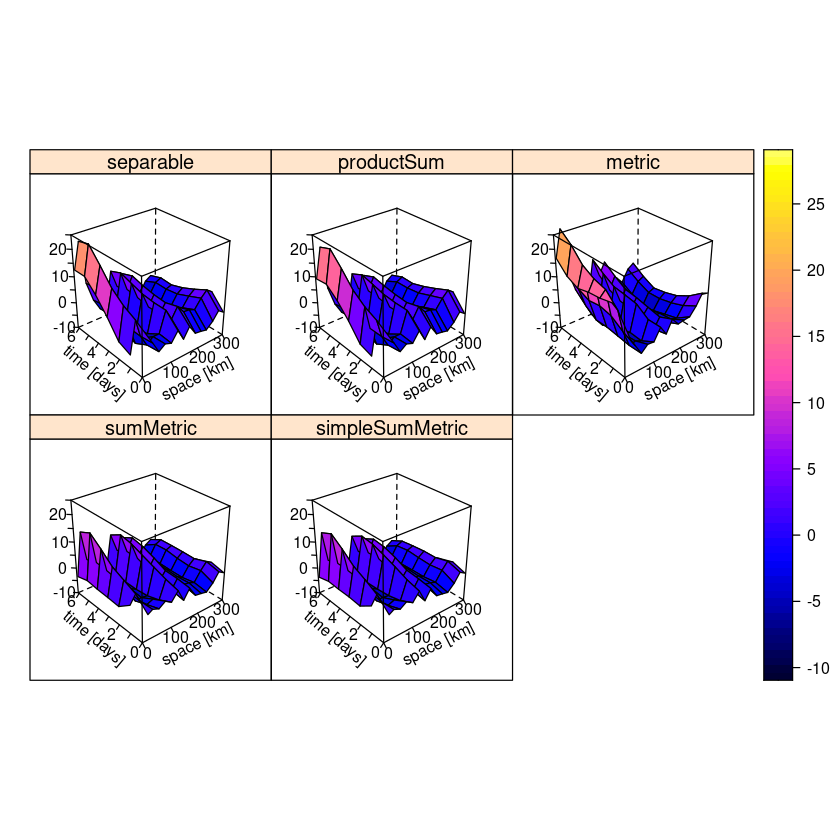

In [4]:
demo(stkrige)